**최소제곱추정?**

<br>

- 산점도를 통해 추세선을 찾자. **추세선과 실제 관측치의 오차가 최소**가 되도록.
    - 거리는? 절대값 거리, 민코프스키 거리, 제곱 거리 등...
- 오차를 나타내는 **오차함수(비용함수, Cost Function 이라고도 함)** 는 어떻게 정의할까?
    - 말 그대로 **'실제 관측치 - 예측치 (이론치)'** 로 정의. 일반적인 형태는 다음처럼.
    $$\sum_i (y-y_i)^2$$

**회귀분석?**

<br>

- 수치형 데이터를 예측하는 지도학습. (선형회귀분석)
    - 범주형 예측, 이산형 예측 또한 가능.
- 데이터를 잘 적합한다? 비용함수를 최소로 만드는 그래프를 구하는 것.
    - 비용함수가 최소가 되는 방향으로 움직이는 모델을 찾는 것.
    - 즉, 최소제곱추정 을 이용해 회귀 모형을 찾아감.

$$y = f(x)$$

 - y : 예측값, 반응변수, 종속변수
 - x : 관측값, 설명변수, 독립변수 

- 대부분은 y가 x의 1차식으로 이뤄진 회귀모형. 단순 or 다중.
    - 일반적인 비즈니스 분야에선 x가 2개 이상인 다중 선형모형이 많음.

**회귀모형의 평가?**

<br>

- 일반적으론 결정계수 ($R^2$-square)로 판단. **모형이 데이터를 얼마나 잘 설명하는지** 나타내는 지수.
    - 보통 **0.7 이상이면 쓸만한 모형**이라고 볼 수 있음.
- F-value & p-value : **회귀 모형의 신뢰도를 통계적으로 평가**하기 위해 사용.
    - F-value가 **클수록 모델의 신뢰도는 높다**고 볼 수 있음. **회귀모형의 신뢰성을 평가하는 수치**.
    - p-value는 **0.05나 0.01보다 작아야 안정된 모형**이라 볼 수 있음.
        - **한쪽이 커지면 한쪽이 작아짐.**
- t-value : 회귀 모형의 **계수 신뢰도를 평가**하기 위해 사용.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data loading
h_stock = pd.read_csv('UseData/H_stock.csv')
s_stock = pd.read_csv('UseData/S_stock.csv')
k_index = pd.read_csv('UseData/K_index.csv')

In [10]:
# 불러온 데이터 둘러보기
print(h_stock.head)
print(s_stock.head)
print(k_index.head)

<bound method NDFrame.head of            date  h_price  h_rate
0    2015-03-25    45500     NaN
1    2015-03-26    45900   0.879
2    2015-03-27    45000  -1.961
3    2015-03-30    45600   1.333
4    2015-03-31    46000   0.877
..          ...      ...     ...
244  2016-03-21    60100   0.839
245  2016-03-22    59200  -1.498
246  2016-03-23    58900  -0.507
247  2016-03-24    59300   0.679
248  2016-03-25    59300   0.000

[249 rows x 3 columns]>
<bound method NDFrame.head of            date  s_price  s_rate
0    2015-03-25  1485000     NaN
1    2015-03-26  1421000  -4.310
2    2015-03-27  1421000   0.000
3    2015-03-30  1428000   0.493
4    2015-03-31  1441000   0.910
..          ...      ...     ...
244  2016-03-21  1267000  -0.471
245  2016-03-22  1269000   0.158
246  2016-03-23  1279000   0.788
247  2016-03-24  1282000   0.235
248  2016-03-25  1288000   0.468

[249 rows x 3 columns]>
<bound method NDFrame.head of            date    kospi  k_rate
0    2015-03-25  2042.81     NaN
1 

In [11]:
# 헤더 정보 제거
h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

# 제거 후 데이터 확인
print(h_rate.shape)
print(s_rate.shape)
print(k_rate.shape)

(248,)
(248,)
(248,)


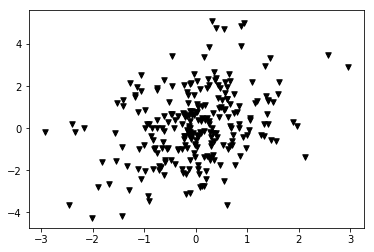

In [12]:
# 회귀 모형으로 학습시키기 위해 차원 조정
# (248,) --> (248, 1)
h_rate = h_rate.reshape(h_rate.shape[0], 1)
s_rate = s_rate.reshape(s_rate.shape[0], 1)
k_rate = k_rate.reshape(k_rate.shape[0], 1)

# 차원조정 후 어떻게 생겼는지 확인해보자.
plt.scatter(k_rate, h_rate, c='black', s=30, marker='v', label='train')

기울기 :  [[0.63482159]]
절편 :  [0.12628453]
결정계수 :  0.1064571423759525


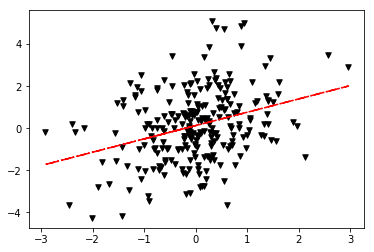

In [15]:
# 모형 학습
model = LinearRegression()
model.fit(k_rate, h_rate)

# 학습한 모형이 데이터를 어떻게 fit 했는지 확인해보자.
plt.scatter(k_rate, h_rate, c='black', s=30, marker='v', label='train')
plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='h stock', c='red')

# 모형의 계수, 결정계수 확인?
print('기울기 : ', model.coef_)
print('절편 : ', model.intercept_)
print('결정계수 : ', model.score(k_rate, h_rate))

    k_rate(코스피 지수)가 증가하면 h_rate(H사의 주가)도 전반적으로 증가함을 볼 수 있다.
    
    설명력은 그닥.

기울기 :  [[1.00132771]]
절편 :  [-0.03500143]
결정계수 :  0.2644483831226938


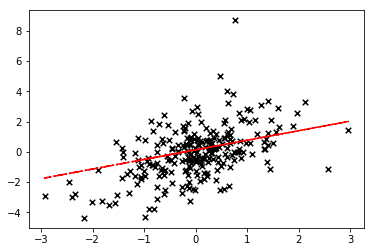

In [18]:
# 또다른 모형 학습
model2 = LinearRegression()
model2.fit(k_rate, s_rate)

# plot을 통해 fit 확인
plt.scatter(k_rate, s_rate, c='black', s=30, marker='x', label='train')
plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='h stock', c='red')

print('기울기 : ', model2.coef_)
print('절편 : ', model2.intercept_)
print('결정계수 : ', model2.score(k_rate, s_rate))

**비선형 회귀모형은 어떻게?**

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 2차 회귀모형을 위한 임의 데이터 생성.
x_train = np.arange(-10, 10, 1 / 50.).reshape(-1, 1)
print(x_train.shape)
x_train2 = x_train**2 + np.random.randn(len(x_train), 1) * 30
print(x_train2.shape)

(1000, 1)
(1000, 1)


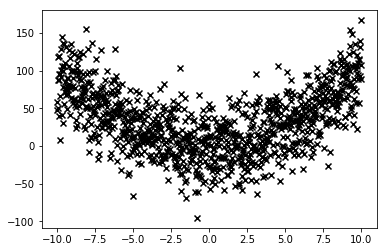

In [21]:
# 만든 데이터는 어떻게 생겼을까.
plt.scatter(x_train, x_train2, c='black', s=36, marker='x', label='sample')

In [22]:
# 모형에 넣기 위한 훈련용 data 생성
X2_TRAIN = np.c_[x_train**2, x_train]
X2_TRAIN.shape

(1000, 2)

    여기서 np.c_ 는 두 개의 1차원 배열을 칼럼으로 세로로 붙여 2차원 배열을 만드는 방법.
    
    https://rfriend.tistory.com/352

회귀계수 :  [[1.0078489  0.03722474]]
절편 :  [-0.37285346]
결정 계수 :  0.5041039460505303


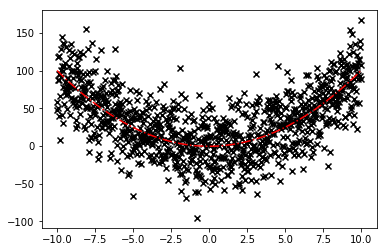

In [25]:
# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X2_TRAIN, x_train2)

# 어떻게 예측했는지 확인
plt.scatter(x_train, x_train2, c='black', s=36, marker='x', label='sample')
plt.plot(x_train, model.predict(X2_TRAIN), linestyle='-.', label='sample', c='red')

print('회귀계수 : ', model.coef_)
print('절편 : ', model.intercept_)
print('결정 계수 : ', model.score(X2_TRAIN, x_train2))

## 당뇨병 데이터 예제

In [39]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Dataset loading
data = datasets.load_diabetes()

In [40]:
# 데이터는 어떻게 생겼을까.
print(data.data.shape)
print(data.data)
print(len(data.data))

print(data.DESCR)
print(data.feature_names)

(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
442
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantit

In [52]:
# 훈련을 위한 데이터 나누기
X, Y = normalize(data['data']), data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, Y_train)

(353, 10)
(89, 10)
(353,)
(89,)


LinearRegression()

In [53]:
# 예측값 확인?
Y_pred = model.predict(X_test)
Y_pred

array([124.74623012,  84.44645686, 136.53771369,  80.59843611,
       217.01895832, 197.22452078, 108.21978702, 232.51913143,
       117.65903461,  88.88501837, 269.09451916,  84.03995639,
       244.03435168, 230.61071416, 132.61734109, 100.19389114,
       153.96584776,  99.227206  , 178.50940038, 182.35834721,
       110.57264065, 207.08515076, 194.77258432, 208.3338501 ,
       180.2026081 ,  90.32782301, 157.79517542, 121.87193432,
       177.80275451, 176.16362391, 139.66479252, 134.07176703,
       198.79758886, 114.39538714,  86.91136335,  82.03298313,
       163.46650688, 109.61532571, 111.67204986, 185.90016526,
       162.22216263, 204.84600904, 112.70898587, 214.72534679,
       187.75158624, 123.98638606, 109.7334721 , 150.62933781,
       142.07607804, 113.51501841, 121.34793821, 230.7295474 ,
       198.00987774, 167.72325158, 125.74349013, 209.12130214,
       172.99284582,  87.84772693, 191.32238163, 196.74694561,
        98.65420748, 164.81206555,  66.78398325,  68.39

In [54]:
# 스코어, 계수는 어떻게 표현됐을까
print('회귀 계수 : ', model.coef_)
print('결정 계수 : %.3f' % r2_score(Y_test, Y_pred))

# 그래프로 한번 확인해보자. 음 형태가 다른뎅
# plt.scatter(X_test, Y_test, color='black')
# plt.plot(X_test, Y_pred, color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.show()

회귀 계수 :  [ -1.56858488 -22.81670227  77.27922725  45.50245319 -49.86980105
  12.52670293   2.54352633  37.12322271  86.90635027  15.53610582]
결정 계수 : 0.542
